In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

time_arr = [dt.time() for dt in 
       datetime_range(datetime(2016, 9, 1, 0), datetime(2016, 9, 2, 1), 
       timedelta(minutes=15))][1:-3]

In [4]:
def func2(x):
    for i in range(len(time_arr)):
        if x<=time_arr[i]:
            return i
    return None

In [5]:
import numpy as np

def q1(x):
    # print(x)
    return np.percentile(x, 25)

def q2(x):
    return np.percentile(x, 50)

def q3(x):
    return np.percentile(x, 75)


In [6]:
apc_df =  pd.read_parquet('./carta-apc.parquet/2021_10_24_gtfs_days', engine='pyarrow').sort_values(['transit_date', 'time_actual_arrive']).reset_index(drop=True)

In [7]:
#choose time of bus stop arrival for each day
apc_df['time_only'] = pd.to_datetime(apc_df['time_actual_arrive'],format= '%H:%M:%S' ).dt.time

In [8]:
# apc_df[['transit_date', 'time_actual_arrive', 'time_only', 'ons', 'offs', 'load']].head()

In [9]:
#choose only weekdays
apc_df = apc_df[apc_df.type_of_day == 'weekday'].reset_index()

In [10]:
# group by 15min intervals
apc_df2 = apc_df
# apc_df2['time_only'] = apc_df2['time_only'].astype(str)
apc_df2 = apc_df2.dropna(subset=['time_only'])
apc_df2['time_grp'] = apc_df2.time_only.apply(lambda x: func2(x))

c:\Users\senr1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
len(apc_df2.dropna(subset=['time_only']).time_grp.unique())

84

### for ons

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

In [17]:
apc_df2.head()

,index,stop_id,gtfs_file,block_key,block_number,branch,trip_start_comments,dayofweek,delay,route_direction_name,dwell_time,first_last_stop,gtfs_start_date,gtfs_end_date,match_count,match_distance,load,offs,ons,passengers_spot,pattern_id,route_name,route_number,run_key,run_number,running_time_actual,schedule_name,segment_miles,service_period,signup_name,sort_order,transit_date,time_actual_arrive,time_actual_depart,time_scheduled,timepoint,timepoint_miles,trip_id,trip_number,trip_start_time,vehicle_description,vehicle_id,vehicle_capacity,wheelchairs,input_file_md5,stop_name,gtfs_trip_id,route_id,gtfs_shape_id,gtfs_service_id,map_latitude,map_longitude,hour_of_trip,window_of_day,type_of_day,time_only,time_grp
0,0,233,2021-10-24.zip,1551,2802,[10A]STUART + DODSON >> SHOLAR + CARTA,Trip starts at 11:55p at Stu/Dod and ends at 1...,0,NaN,INBOUND,0.0,2,2021-10-24,2022-05-07,58.0,1.0,0,0,0,NaN,975,Route #10A,10.1,45,45,NaN,Oct21 (Weekday),0.08,Weekday,October 24 2021,120,2021-11-01,2021-11-01 00:00:05,2021-11-01 00:00:05,NaT,0,NaN,205087,42,2021-11-01 23:55:00,35ft Complete Coach Works Rebuilt Gillig,154,32.0,0,097d03b6b69a4e71aac5cab4e7e5f712,DODSON + CUSHMAN,205087020,10A,shp-10A-06,1,35.070882,-85.250912,23,6,weekday,00:00:05,0.0
1,1,234,2021-10-24.zip,1551,2802,[10A]STUART + DODSON >> SHOLAR + CARTA,Trip starts at 11:55p at Stu/Dod and ends at 1...,0,NaN,INBOUND,0.0,2,2021-10-24,2022-05-07,58.0,0.0,0,0,0,NaN,975,Route #10A,10.1,45,45,NaN,Oct21 (Weekday),0.09,Weekday,October 24 2021,130,2021-11-01,2021-11-01 00:00:15,2021-11-01 00:00:15,NaT,0,NaN,205087,42,2021-11-01 23:55:00,35ft Complete Coach Works Rebuilt Gillig,154,32.0,0,097d03b6b69a4e71aac5cab4e7e5f712,DODSON + BACHMAN,205087020,10A,shp-10A-06,1,35.069802,-85.251532,23,6,weekday,00:00:15,0.0
2,2,235,2021-10-24.zip,1551,2802,[10A]STUART + DODSON >> SHOLAR + CARTA,Trip starts at 11:55p at Stu/Dod and ends at 1...,0,NaN,INBOUND,0.0,2,2021-10-24,2022-05-07,58.0,0.0,0,0,0,NaN,975,Route #10A,10.1,45,45,NaN,Oct21 (Weekday),0.08,Weekday,October 24 2021,140,2021-11-01,2021-11-01 00:00:25,2021-11-01 00:00:25,NaT,0,NaN,205087,42,2021-11-01 23:55:00,35ft Complete Coach Works Rebuilt Gillig,154,32.0,0,097d03b6b69a4e71aac5cab4e7e5f712,DODSON + FAIRLEIGH,205087020,10A,shp-10A-06,1,35.068625,-85.252167,23,6,weekday,00:00:25,0.0
3,3,236,2021-10-24.zip,1551,2802,[10A]STUART + DODSON >> SHOLAR + CARTA,Trip starts at 11:55p at Stu/Dod and ends at 1...,0,NaN,INBOUND,0.0,2,2021-10-24,2022-05-07,58.0,0.0,0,0,0,NaN,975,Route #10A,10.1,45,45,NaN,Oct21 (Weekday),0.08,Weekday,October 24 2021,150,2021-11-01,2021-11-01 00:00:35,2021-11-01 00:00:35,NaT,0,NaN,205087,42,2021-11-01 23:55:00,35ft Complete Coach Works Rebuilt Gillig,154,32.0,0,097d03b6b69a4e71aac5cab4e7e5f712,DODSON + APPLING,205087020,10A,shp-10A-06,1,35.067568,-85.252723,23,6,weekday,00:00:35,0.0
4,4,237,2021-10-24.zip,1551,2802,[10A]STUART + DODSON >> SHOLAR + CARTA,Trip starts at 11:55p at Stu/Dod and ends at 1...,0,NaN,INBOUND,0.0,2,2021-10-24,2022-05-07,58.0,0.0,0,0,0,NaN,975,Route #10A,10.1,45,45,NaN,Oct21 (Weekday),0.15,Weekday,October 24 2021,160,2021-11-01,2021-11-01 00:00:45,2021-11-01 00:00:45,NaT,0,NaN,205087,42,2021-11-01 23:55:00,35ft Complete Coach Works Rebuilt Gillig,154,32.0,0,097d03b6b69a4e71aac5cab4e7e5f712,DODSON + DAISY,205087020,10A,shp-10A-06,1,35.066483,-85.253312,23,6,weekday,00:00:45,0.0


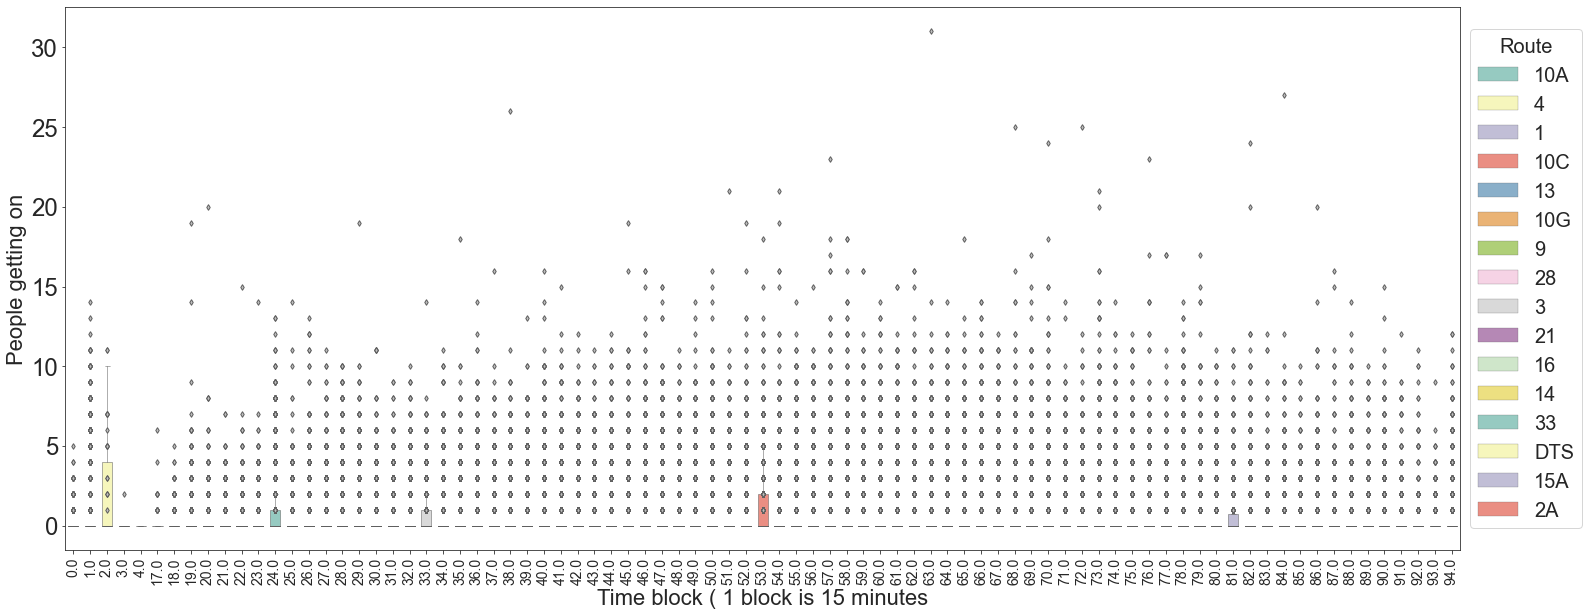

In [54]:
df_plt = apc_df2
#boxplot of occupancy of each bus by trip
fig1st, oc = plt.subplots(figsize=(25, 10))
sns.set_style("ticks")
sns.boxplot(x = 'time_grp', y = 'ons', data = df_plt, hue="route_id",
            linewidth=0.5, palette="Set3",
            flierprops = dict(markerfacecolor='0.75', markersize=4,linestyle='none'),
            dodge =False,width=0.6)
oc.set_xlabel('Time block ( 1 block is 15 minutes',fontsize=22)
oc.set_ylabel('People getting on',fontsize=22)
plt.setp(oc.get_xticklabels(), fontsize = 14)
plt.setp(oc.get_yticklabels(), fontsize = 24)
plt.xticks(rotation = 90)
# oc.set_xticks([0,len(pd.unique(df_plt['trip']))])
# oc.set_xticklabels([df_plt['time'].values[0],df_plt['time'].values[-1]])
oc.legend(fontsize=20,title="Route", title_fontsize = 20,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [230]:
# apc_df_grp = apc_df2.groupby('time_grp').agg(Count=("ons", 'count'),    
#                   Sum=('ons','sum'),      
#                   min=('ons', 'min'),  
#                   max=('ons', 'max'),  
#                   Q1= ('ons', q1), 
#                   Q2= ('ons', np.median), 
#                   Q3= ('ons', q3)).reset_index()

In [231]:
# apc_df_grp.time_grp = apc_df_grp.time_grp.astype(int)

In [236]:
# apc_df_grp.set_index('time_grp').reset_index().drop(['time_grp', 'Count', 'Sum'], axis=1).T.boxplot(figsize=(20, 10), rot=90)

In [49]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas

# fig, ax = plt.subplots(figsize=(20, 12))
# apc_df_grp.set_index('time_grp').drop(['Count', 'Sum'], axis=1).T.boxplot(ax=ax, notch=True, bootstrap=5000, figsize=(20, 12))
# # ax.set_xticks(range(10))
# # ax.set_xticklabels(range(10))
# plt.show()

### for loads

In [ ]:
# apc_df_grp = apc_df2.groupby('time_grp').agg(Count=("load", 'count'),    
#                   Sum=('load','sum'),      
#                   min=('load', 'min'),  
#                   max=('load', 'max'),  
#                   Q1= ('load', q1), 
#                   Q2= ('load', np.median), 
#                   Q3= ('load', q3)).reset_index()

In [ ]:
# apc_df_grp.time_grp = apc_df_grp.time_grp.astype(int)

In [51]:
# apc_df_grp.set_index('time_grp').reset_index().drop(['time_grp', 'Count', 'Sum'], axis=1).T.boxplot(figsize=(20, 10), rot=90)

In [52]:
# apc_df2[['time_grp', 'ons']].boxplot(by='time_grp', figsize=(20, 12), rot=90)

## testing for only 1 day

In [21]:
a2 = apc_df[apc_df.transit_date == '2022-01-11']
a2['time_only'] = pd.to_datetime(a2['time_actual_arrive'],format= '%H:%M:%S' ).dt.time
a2 = a2[a2.type_of_day == 'weekday'].reset_index()

a2 = a2.dropna(subset=['time_only'])
a2['time_grp'] = a2.time_only.apply(lambda x: func2(x))

a2_grp = a2.groupby('time_grp').agg(Count=("ons", 'count'),    
                  Sum=('ons','sum'),      
                  min=('ons', 'min'),  
                  max=('ons', 'max'),  
                  Q1= ('ons', q1), 
                  Q2= ('ons', np.median), 
                  Q3= ('ons', q3)).reset_index()

c:\Users\senr1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
a2 = a2.dropna(subset=['time_grp'])

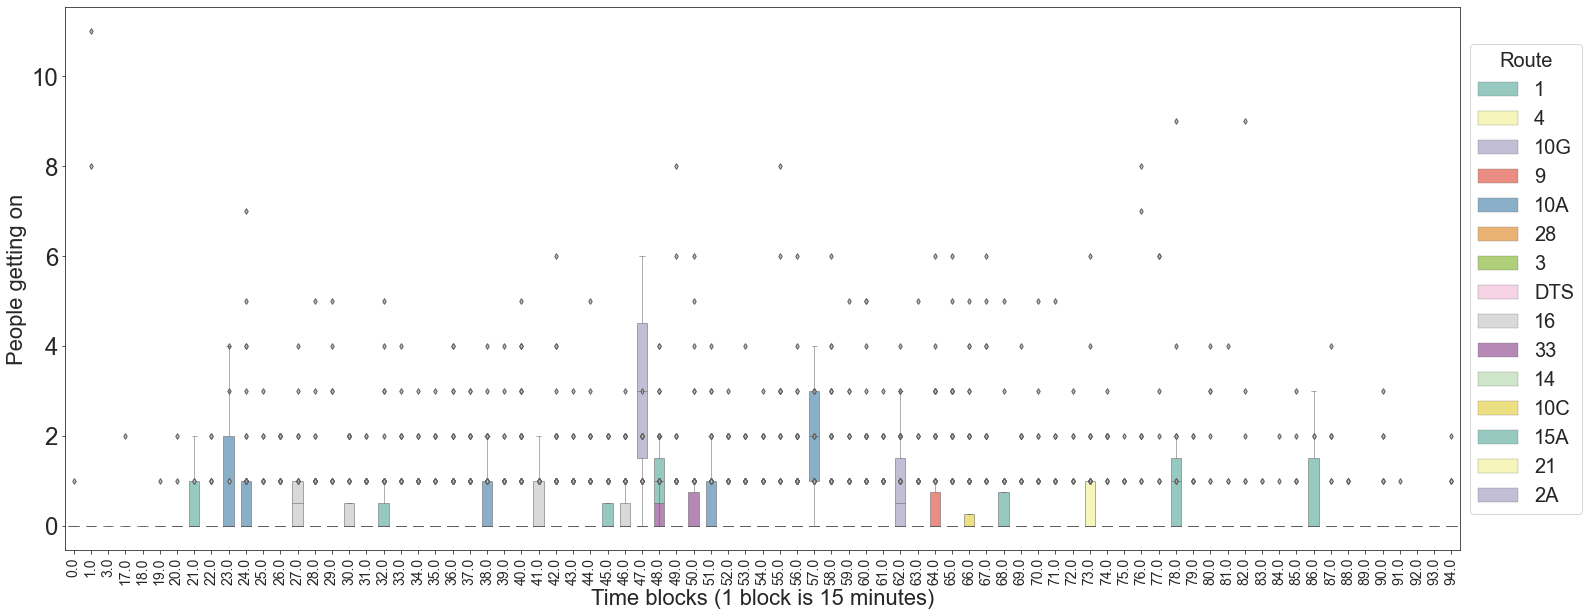

In [48]:
df_plt = a2
# [a2.time_grp<30]
#boxplot of occupancy of each bus by trip
fig1st, oc = plt.subplots(figsize=(25, 10))
sns.set_style("ticks")
sns.boxplot(x = 'time_grp', y = 'ons', data = df_plt, hue="route_id",
            linewidth=0.5, palette="Set3",
            flierprops = dict(markerfacecolor='0.75', markersize=4,linestyle='none'),
            dodge =False,width=0.6)
oc.set_xlabel('Time blocks (1 block is 15 minutes)',fontsize=22)
oc.set_ylabel('People getting on',fontsize=22)
plt.setp(oc.get_xticklabels(), fontsize = 14)
plt.setp(oc.get_yticklabels(), fontsize = 24)
plt.xticks(rotation = 90)
# oc.set_xticks(a2.time_grp.unique())
# oc.set_xticklabels([df_plt['time'].values[0],df_plt['time'].values[-1]])
oc.legend(fontsize=20,title="Route", title_fontsize = 20,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [212]:
# apc_df2 = apc_df.dropna(subset=['ons'])
# apc_df2['time_only'] = apc_df2['time_only'].astype(str)
# apc_df2['time_only'] = apc_df2['time_only'].apply(pd.Timestamp)
# print(apc_df2)
# apc_df_idx = pd.DatetimeIndex(apc_df2.time_only.values)
# apc_df2 = apc_df2.set_index(apc_df_idx) 
# apc_df2.groupby(pd.Grouper(freq='15min', base=0, label='right')).agg(Count=("ons", 'count'),    
#                   Sum=('ons','sum'),      
#                   min=('ons', 'min'),  
#                   max=('ons', 'max'),  
#                   Q1= ('ons',percentile(25)), #This is for first quartile
#                   Q2= ('ons',percentile(50)), #2nd Quartile
#                   Q3= ('ons',percentile(75)))


# apc_df2.groupby(pd.Grouper(freq='15Min', offset=0, label='right')).agg(func={
    
#                   'Count':pd.NamedAgg(column='ons', aggfunc='count'),    
#                   'Sum':pd.NamedAgg(column='ons', aggfunc='sum'),      
#                   'min':pd.NamedAgg(column='ons', aggfunc='min'),  
#                   'max':pd.NamedAgg(column='ons', aggfunc='max'),  
#                   'Q1': pd.NamedAgg(column='ons', aggfunc=percentile(25)), 
#                   'Q2': pd.NamedAgg(column='ons', aggfunc=percentile(50)),
#                   'Q3': pd.NamedAgg(column='ons', aggfunc=percentile(75))}
#                   )